## 機械学習スクラッチ

### スクラッチの意義

ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。


スクラッチをすることでscikit-learnなどのライブラリを動かすだけでは掴みづらい、アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねますが、それは主な目的ではありません。


以下のような効果を狙っています。新たな手法に出会った時に理論・数式を理解しやすくする

- 新たな手法に出会った時に理論・数式を理解しやすくする
- ライブラリを使う上での曖昧さを減らす
- 既存の実装を読みやすくする


#### 下準備

前回の問題のアヤメの問題でスクラッチ実装が実際に動くかをチェックしたいので、データをダウンロードしておく。今回抜き出すデータは以下の通りとする。

- virgicolorとvirginica
- sepal_lengthとpetal_length

In [1]:
# 使用するライブラリーをインポート
import seaborn as sns  # バイオリン図で必要になる（seaborn ライブラリーの violinplot メソッド）
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データを読み込む
from sklearn import datasets

# return_X_y=Trueとすることでdataとtargetを直接取得できる。
X, y = datasets.load_iris(return_X_y=True)

In [27]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### 【問題1】train_test_splitのスクラッチ

スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます。以下の雛形をベースとして関数を完成させてください。

なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [3]:
# シンプルデータセット1のコードを参考に関数を作成する

def scratch_train_test_split(X, y, train_size=0.8):
    # 「0〜Xの行数」までの数字を並べた配列を作成する
    array = np.arange(X.shape[0])
    # 上記配列の数字をランダムに並べ替える
    idx = np.random.permutation(array)
    # 上記並び替えた数字に対応する順にパラメータの配列を並び替える
    X_idx, y_idx = X[idx], y[idx]

    # データ分割の基準となる行番号を取得する
    ratio = round(train_size * len(y))
    #　上記行番号を基に訓練用、検証用にデータを分割する
    X_train = X_idx[:ratio]
    X_test = X_idx[ratio:]
    y_train = y_idx[:ratio]
    y_test = y_idx[ratio:]

    return X_train, X_test, y_train, y_test

In [4]:
X_train,  X_test, y_train, y_test = scratch_train_test_split(X, y)

#### 【検証】

In [5]:
# 検証用に戻り値を増やした関数を定義する
def scratch_train_test_split2(X, y, train_size=0.8):
    array = np.arange(X.shape[0])
    idx = np.random.permutation(array)
    X_idx, y_idx = X[idx], y[idx]

    ratio = round(train_size * len(y))
    X_train = X_idx[:ratio]
    X_test = X_idx[ratio:]
    y_train = y_idx[:ratio]
    y_test = y_idx[ratio:]

    return X_train, X_test, y_train, y_test, X_idx, y_idx, idx


X_train, X_test, y_train, y_test, X_idx, y_idx, idx = scratch_train_test_split2(
    X, y)

In [6]:
# サンプル1
# ①配列がidxに従ってランダムに並び替わっているか、
# ②X,yの並び替えが対応しているかを確認する
print(idx[0])

print(X[120])
print(y[120])
print(X_idx[0])
print(y_idx[0])
print(X_train[0])
print(y_train[0])

75
[6.9 3.2 5.7 2.3]
2
[6.6 3.  4.4 1.4]
1
[6.6 3.  4.4 1.4]
1


In [7]:
# サンプル2
print(idx[10])
print(X[48])
print(y[48])
print(X_idx[10])
print(y_idx[10])
print(X_train[10])
print(y_train[10])

98
[5.3 3.7 1.5 0.2]
0
[5.1 2.5 3.  1.1]
1
[5.1 2.5 3.  1.1]
1


In [8]:
print(idx[140])
print(X[75])
print(y[75])
print(X_idx[140])
print(y_idx[140])
print(X_test[140-120])
print(y_test[140-120])

13
[6.6 3.  4.4 1.4]
1
[4.3 3.  1.1 0.1]
0
[4.3 3.  1.1 0.1]
0


## scikit-learnを用いて機械学習を行うコードを作成

scikit-learnを使ったコードを作成していきます。


検証データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。


**分類問題**

分類は3種類の手法をスクラッチします。

- ロジスティック回帰
- SVM
- 決定木

ロジスティック回帰はscikit-learnにおいてLogisticRegressionクラスとSGDClassifierクラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数で`loss="log"`とすることでロジスティック回帰の計算になります。

データセットは3種類用意します。


1つ目は事前学習期間同様にirisデータセットです。

2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。

- virgicolorとvirginica

残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数`X`,目的変数`y`が作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。

### 【問題2】 分類問題を解くコードの作成

上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

#### データセット作成

**アヤメのデータセット**

In [34]:
from sklearn.datasets import load_iris
df = load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [74]:
X_data = pd.DataFrame(iris_dataset.data, columns=[
                      "sepal_length", "sepal_width", "petal_length", "petal_width"])
y_data = pd.DataFrame(iris_dataset.target, columns=["Species"])

# Xとyを列方向に結合
df = pd.concat([X_data, y_data], axis=1)

# 条件に従って抜き出し
df_ex = df[df['Species'] >= 1]

X = np.array(
    df_ex[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(df_ex['Species'])

df_ex

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**シンプルデータセット1作成コード**

In [11]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0, 0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X1 = np.concatenate((f0, f1))
y1 = np.concatenate((np.ones((int(n_samples/2))),
                     np.ones((int(n_samples/2))) * (-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X_set1 = X1[random_index]
y_set1 = y1[random_index]

# 作成した関数を用いて訓練用と検証用に分割する
X_train_set1, X_test_set1, y_train_set1, y_test_set1 = scratch_train_test_split(
    X_set1, y_set1, train_size=0.8)

In [26]:
print(X_train_set1.shape)
print(X_test_set1.shape)
print(y_train_set1.shape)
print(y_test_set1.shape)
print(type(X_train_set1))
print(type(y_train_set1))

(400, 2)
(100, 2)
(400,)
(100,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**シンプルデータセット2作成コード**

In [12]:
X_set2 = np.array([[-0.44699, -2.8073], [-1.4621, -2.4586],
                   [0.10645,  1.9242], [-3.5944, -4.0112],
                   [-0.9888,  4.5718], [-3.1625, -3.9606],
                   [0.56421,  0.72888], [-0.60216,  8.4636],
                   [-0.61251, -0.75345], [-0.73535, -2.2718],
                   [-0.80647, -2.2135], [0.86291,  2.3946],
                   [-3.1108,  0.15394], [-2.9362,  2.5462],
                   [-0.57242, -2.9915], [1.4771,  3.4896],
                   [0.58619,  0.37158], [0.6017,  4.3439],
                   [-2.1086,  8.3428], [-4.1013, -4.353],
                   [-1.9948, -1.3927], [0.35084, -0.031994],
                   [0.96765,  7.8929], [-1.281, 15.6824],
                   [0.96765, 10.083], [1.3763,  1.3347],
                   [-2.234, -2.5323], [-2.9452, -1.8219],
                   [0.14654, -0.28733], [0.5461,  5.8245],
                   [-0.65259,  9.3444], [0.59912,  5.3524],
                   [0.50214, -0.31818], [-3.0603, -3.6461],
                   [-6.6797,  0.67661], [-2.353, -0.72261],
                   [1.1319,  2.4023], [-0.12243,  9.0162],
                   [-2.5677, 13.1779], [0.057313,  5.4681]])
y_set2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 作成した関数を用いて訓練用と検証用に分割する
X_train_set2, X_test_set2, y_train_set2, y_test_set2 = scratch_train_test_split(
    X_set2, y_set2, train_size=0.8)

In [63]:
# 標準化
from sklearn.preprocessing import StandardScaler

sc0 = StandardScaler()
sc1 = StandardScaler()
sc2 = StandardScaler()

sc0.fit(X_train_set0)
X_train_set0_std = sc0.transform(X_train_set0)
X_test_set0_std = sc0.transform(X_test_set0)

sc1.fit(X_train_set1)
X_train_set1_std = sc1.transform(X_train_set1)
X_test_set1_std = sc1.transform(X_test_set1)

sc2.fit(X_train_set2)
X_train_set2_std = sc2.transform(X_train_set2)
X_test_set2_std = sc2.transform(X_test_set2)

#### ロジスティック回帰

In [64]:
# SGDClassifierクラスを読み込む
from sklearn.linear_model import SGDClassifier

# インスタンスを生成する
sgd_set0 = SGDClassifier(loss="log")
sgd_set1 = SGDClassifier(loss="log")
sgd_set2 = SGDClassifier(loss="log")

# 学習する
sgd_set0.fit(X_train_set0_std, y_train_set0)
sgd_set1.fit(X_train_set1_std, y_train_set1)
sgd_set2.fit(X_train_set2_std, y_train_set2)

# 推定する
y_pred_sgd_set0 = sgd_set0.predict(X_test_set0_std)
y_pred_sgd_set1 = sgd_set1.predict(X_test_set1_std)
y_pred_sgd_set2 = sgd_set2.predict(X_test_set2_std)

In [84]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [85]:
print("**irisデータセット**")
print("正解率：{}".format(metrics.accuracy_score(y_test_set0, y_pred_sgd_set0)))
print("適合率：{}".format(metrics.precision_score(y_test_set0, y_pred_sgd_set0)))
print("再現率：{}".format(metrics.recall_score(y_test_set0, y_pred_sgd_set0)))
print("F値：{}".format(metrics.f1_score(y_test_set0, y_pred_sgd_set0)))
print("混合行列：{}".format(metrics.confusion_matrix(y_test_set0, y_pred_sgd_set0)))

**irisデータセット**
正解率：0.9
適合率：1.0
再現率：0.8
F値：0.888888888888889
混合行列：[[ 8  2]
 [ 0 10]]


In [86]:
print("**シンプルデータセット1**")
print("正解率：{}".format(metrics.accuracy_score(y_test_set1, y_pred_sgd_set1)))
print("適合率：{}".format(metrics.precision_score(y_test_set1, y_pred_sgd_set1)))
print("再現率：{}".format(metrics.recall_score(y_test_set1, y_pred_sgd_set1)))
print("F値：{}".format(metrics.f1_score(y_test_set1, y_pred_sgd_set1)))
print("混合行列：{}".format(metrics.confusion_matrix(y_test_set1, y_pred_sgd_set1)))

**シンプルデータセット1**
正解率：1.0
適合率：1.0
再現率：1.0
F値：1.0
混合行列：[[44  0]
 [ 0 56]]


In [87]:
print("**シンプルデータセット2**")
print("正解率：{}".format(metrics.accuracy_score(y_test_set2, y_pred_sgd_set2)))
print("適合率：{}".format(metrics.precision_score(y_test_set2, y_pred_sgd_set2)))
print("再現率：{}".format(metrics.recall_score(y_test_set2, y_pred_sgd_set2)))
print("F値：{}".format(metrics.f1_score(y_test_set2, y_pred_sgd_set2)))
print("混合行列：{}".format(metrics.confusion_matrix(y_test_set2, y_pred_sgd_set2)))

**シンプルデータセット2**
正解率：0.25
適合率：0.3333333333333333
再現率：0.5
F値：0.4
混合行列：[[0 4]
 [2 2]]


In [88]:
# 表を作るのに使用
pred_df = pd.DataFrame({'IRIS_SGD': [metrics.accuracy_score(y_test_set0, y_pred_sgd_set0),
                                     metrics.precision_score(
                                         y_test_set0, y_pred_sgd_set0),
                                     metrics.recall_score(
                                         y_test_set0, y_pred_sgd_set0),
                                     metrics.f1_score(
                                         y_test_set0, y_pred_sgd_set0),
                                     metrics.confusion_matrix(y_test_set0, y_pred_sgd_set0)],
                        'Simple1_SGD': [metrics.accuracy_score(y_test_set1, y_pred_sgd_set1),
                                        metrics.precision_score(
                                            y_test_set1, y_pred_sgd_set1),
                                        metrics.recall_score(
                                            y_test_set1, y_pred_sgd_set1),
                                        metrics.f1_score(
                                            y_test_set1, y_pred_sgd_set1),
                                        metrics.confusion_matrix(y_test_set1, y_pred_sgd_set1)],
                        'Simple2_SGD': [metrics.accuracy_score(y_test_set2, y_pred_sgd_set2),
                                        metrics.precision_score(
                                            y_test_set2, y_pred_sgd_set2),
                                        metrics.recall_score(
                                            y_test_set2, y_pred_sgd_set2),
                                        metrics.f1_score(
                                            y_test_set2, y_pred_sgd_set2),
                                        metrics.confusion_matrix(y_test_set2, y_pred_sgd_set2)]},
                       index=["accuracy", "precision", "recall", "f1", "confusion_matrix"])

In [89]:
pred_df

,IRIS_SGD,Simple1_SGD,Simple2_SGD
accuracy,0.9,1,0.25
precision,1,1,0.333333
recall,0.8,1,0.5
f1,0.888889,1,0.4
confusion_matrix,"[[8, 2], [0, 10]]","[[44, 0], [0, 56]]","[[0, 4], [2, 2]]"


In [90]:
# 可視化(シンプルデータセット１、２用)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:, 0])-0.5, np.max(
        X[:, 0])+0.5, step), np.arange(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1,
                 cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1,
                colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y == target][:, 0], X[y == target][:, 1], s=80,
                    color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i],
                              label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

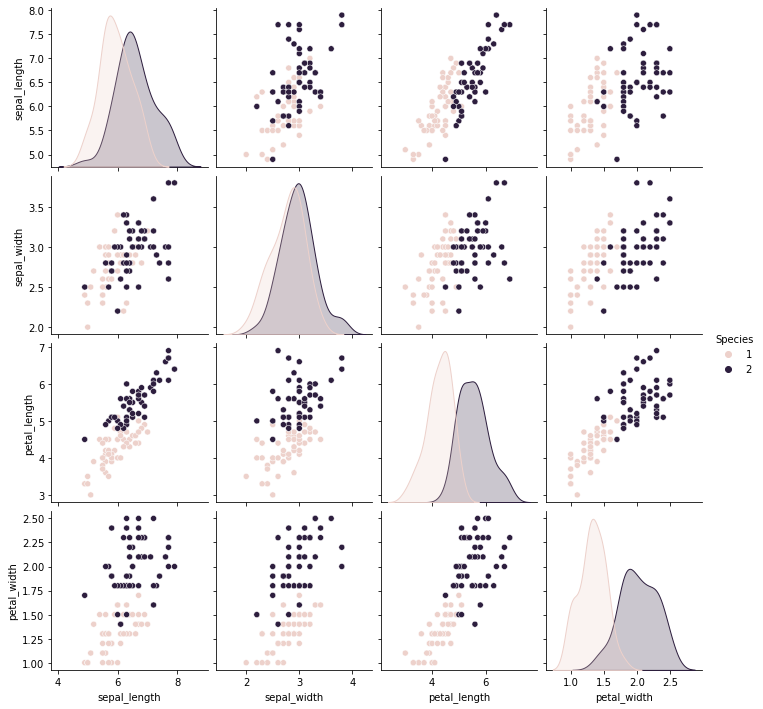

In [99]:
# 可視化、（アヤメのデータセット）
sns.pairplot(df_ex, hue='Species')

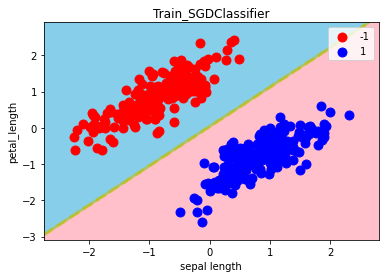

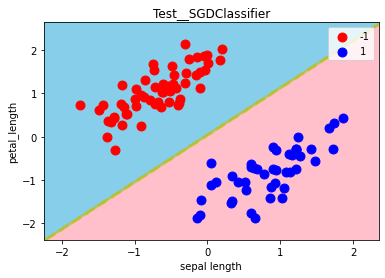

In [102]:
# 可視化（シンプルデータセット１）

train_SGD_cl1 = decision_region(X_train_set1_std, y_train_set1, sgd_set1, title='Train_SGDClassifier',
                                xlabel='sepal length', ylabel='petal_length', target_names=['-1', '1'])
test_SGD_cl1 = decision_region(X_test_set1_std, y_test_set1, sgd_set1, title='Test__SGDClassifier',
                               xlabel='sepal length', ylabel='petal_length', target_names=['-1', '1'])

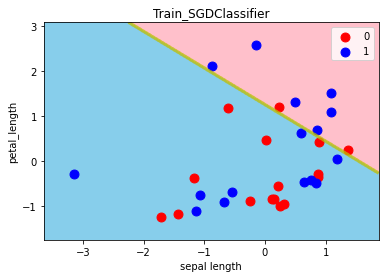

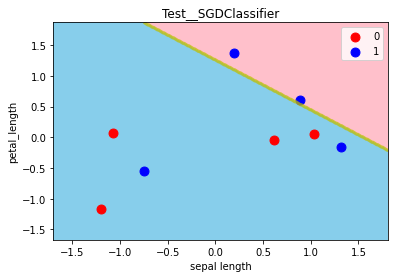

In [103]:
# 可視化（シンプルデータセット2）

train_SGD_cl2 = decision_region(X_train_set2_std, y_train_set2, sgd_set2, title='Train_SGDClassifier',
                                xlabel='sepal length', ylabel='petal_length', target_names=['0', '1'])
test_SGD_cl2 = decision_region(X_test_set2_std, y_test_set2, sgd_set2, title='Test__SGDClassifier',
                               xlabel='sepal length', ylabel='petal_length', target_names=['0', '1'])

#### SVM

In [94]:
# SVCクラスを読み込む
from sklearn.svm import SVC

# インスタンスを生成する
svm_set0 = SVC()
svm_set1 = SVC()
svm_set2 = SVC()

# 学習する
svm_set0.fit(X_train_set0_std, y_train_set0)
svm_set1.fit(X_train_set1_std, y_train_set1)
svm_set2.fit(X_train_set2_std, y_train_set2)

# 推定する
y_pred_svm_set0 = svm_set0.predict(X_test_set0_std)
y_pred_svm_set1 = svm_set1.predict(X_test_set1_std)
y_pred_svm_set2 = svm_set2.predict(X_test_set2_std)

In [95]:
# 各指標値・混合行列を求め、表示する
print("**irisデータセット**")
print("正解率：{}".format(accuracy_score(y_test_set0, y_pred_svm_set0)))
print("適合率：{}".format(precision_score(y_test_set0, y_pred_svm_set0)))
print("再現率：{}".format(recall_score(y_test_set0, y_pred_svm_set0)))
print("F値：{}".format(f1_score(y_test_set0, y_pred_svm_set0)))
print("混合行列：{}".format(confusion_matrix(y_test_set0, y_pred_svm_set0)))

**irisデータセット**
正解率：0.85
適合率：0.8888888888888888
再現率：0.8
F値：0.8421052631578948
混合行列：[[8 2]
 [1 9]]


In [96]:
print("**シンプルデータセット1**")
print("正解率：{}".format(accuracy_score(y_test_set1, y_pred_svm_set1)))
print("適合率：{}".format(precision_score(y_test_set1, y_pred_svm_set1)))
print("再現率：{}".format(recall_score(y_test_set1, y_pred_svm_set1)))
print("F値：{}".format(f1_score(y_test_set1, y_pred_svm_set1)))
print("混合行列：{}".format(confusion_matrix(y_test_set1, y_pred_svm_set1)))

**シンプルデータセット1**
正解率：1.0
適合率：1.0
再現率：1.0
F値：1.0
混合行列：[[44  0]
 [ 0 56]]


In [97]:
print("**シンプルデータセット2**")
print("正解率：{}".format(accuracy_score(y_test_set2, y_pred_svm_set2)))
print("適合率：{}".format(precision_score(y_test_set2, y_pred_svm_set2)))
print("再現率：{}".format(recall_score(y_test_set2, y_pred_svm_set2)))
print("F値：{}".format(f1_score(y_test_set2, y_pred_svm_set2)))
print("混合行列：{}".format(confusion_matrix(y_test_set2, y_pred_svm_set2)))

**シンプルデータセット2**
正解率：0.75
適合率：0.75
再現率：0.75
F値：0.75
混合行列：[[3 1]
 [1 3]]


In [104]:
# 表に追加
pred_df = pred_df.assign(IRIS_SVM=[metrics.accuracy_score(y_test_set0, y_pred_svm_set0),
                                   metrics.precision_score(
                                       y_test_set0, y_pred_svm_set0),
                                   metrics.recall_score(
                                       y_test_set0, y_pred_svm_set0),
                                   metrics.f1_score(
                                       y_test_set0, y_pred_svm_set0),
                                   metrics.confusion_matrix(y_test_set0, y_pred_svm_set0)])

pred_df = pred_df.assign(Simple1_SVM=[metrics.accuracy_score(y_test_set1, y_pred_svm_set1),
                                      metrics.precision_score(
                                          y_test_set1, y_pred_svm_set1),
                                      metrics.recall_score(
                                          y_test_set1, y_pred_svm_set1),
                                      metrics.f1_score(
                                          y_test_set1, y_pred_svm_set1),
                                      metrics.confusion_matrix(y_test_set1, y_pred_svm_set1)])

pred_df = pred_df.assign(Simple2_SVM=[metrics.accuracy_score(y_test_set2, y_pred_svm_set2),
                                      metrics.precision_score(
                                          y_test_set2, y_pred_svm_set2),
                                      metrics.recall_score(
                                          y_test_set2, y_pred_svm_set2),
                                      metrics.f1_score(
                                          y_test_set2, y_pred_svm_set2),
                                      metrics.confusion_matrix(y_test_set2, y_pred_svm_set2)])

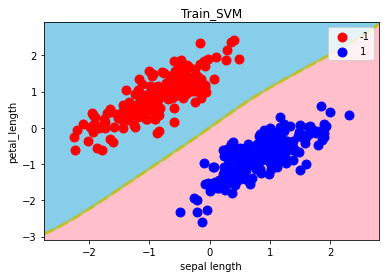

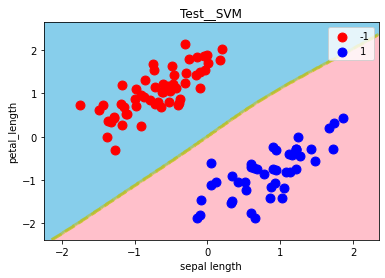

In [106]:
# 可視化（シンプルデータセット１）

train_SVM1 = decision_region(X_train_set1_std, y_train_set1, svm_set1, title='Train_SVM',
                             xlabel='sepal length', ylabel='petal_length', target_names=['-1', '1'])
test_SVM1 = decision_region(X_test_set1_std, y_test_set1, svm_set1, title='Test__SVM',
                            xlabel='sepal length', ylabel='petal_length', target_names=['-1', '1'])

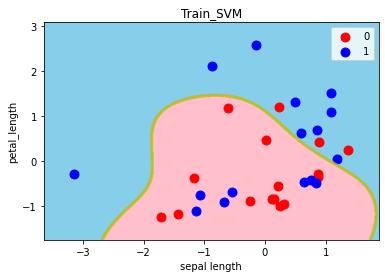

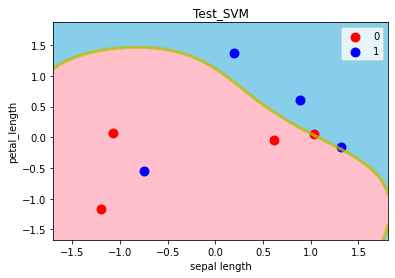

In [107]:
# 可視化（シンプルデータセット2）

train_SVM2 = decision_region(X_train_set2_std, y_train_set2, svm_set2, title='Train_SVM',
                             xlabel='sepal length', ylabel='petal_length', target_names=['0', '1'])
test_SVM2 = decision_region(X_test_set2_std, y_test_set2, svm_set2, title='Test_SVM',
                            xlabel='sepal length', ylabel='petal_length', target_names=['0', '1'])

#### 決定木

In [108]:
from sklearn.tree import DecisionTreeClassifier

# インスタンスを生成する
dtc_set0 = DecisionTreeClassifier()
dtc_set1 = DecisionTreeClassifier()
dtc_set2 = DecisionTreeClassifier()

# 学習する
dtc_set0.fit(X_train_set0_std, y_train_set0)
dtc_set1.fit(X_train_set1_std, y_train_set1)
dtc_set2.fit(X_train_set2_std, y_train_set2)

# 推定する
y_pred_dtc_set0 = dtc_set0.predict(X_test_set0_std)
y_pred_dtc_set1 = dtc_set1.predict(X_test_set1_std)
y_pred_dtc_set2 = dtc_set2.predict(X_test_set2_std)

In [109]:
# 表に追加
pred_df = pred_df.assign(IRIS_DTC=[metrics.accuracy_score(y_test_set0, y_pred_dtc_set0),
                                   metrics.precision_score(
                                       y_test_set0, y_pred_dtc_set0),
                                   metrics.recall_score(
                                       y_test_set0, y_pred_dtc_set0),
                                   metrics.f1_score(
                                       y_test_set0, y_pred_dtc_set0),
                                   metrics.confusion_matrix(y_test_set0, y_pred_dtc_set0)])

pred_df = pred_df.assign(Simple1_DTC=[metrics.accuracy_score(y_test_set1, y_pred_dtc_set1),
                                      metrics.precision_score(
                                          y_test_set1, y_pred_dtc_set1),
                                      metrics.recall_score(
                                          y_test_set1, y_pred_dtc_set1),
                                      metrics.f1_score(
                                          y_test_set1, y_pred_dtc_set1),
                                      metrics.confusion_matrix(y_test_set1, y_pred_dtc_set1)])

pred_df = pred_df.assign(Simple2_DTC=[metrics.accuracy_score(y_test_set2, y_pred_dtc_set2),
                                      metrics.precision_score(
                                          y_test_set2, y_pred_dtc_set2),
                                      metrics.recall_score(
                                          y_test_set2, y_pred_dtc_set2),
                                      metrics.f1_score(
                                          y_test_set2, y_pred_dtc_set2),
                                      metrics.confusion_matrix(y_test_set2, y_pred_dtc_set2)])

In [110]:
pred_df

,IRIS_SGD,Simple1_SGD,Simple2_SGD,IRIS_SVM,Simple1_SVM,Simple2_SVM,IRIS_DTC,Simple1_DTC,Simple2_DTC
accuracy,0.9,1,0.25,0.85,1,0.75,0.85,1,0.5
precision,1,1,0.333333,0.888889,1,0.75,0.888889,1,0.5
recall,0.8,1,0.5,0.8,1,0.75,0.8,1,0.5
f1,0.888889,1,0.4,0.842105,1,0.75,0.842105,1,0.5
confusion_matrix,"[[8, 2], [0, 10]]","[[44, 0], [0, 56]]","[[0, 4], [2, 2]]","[[8, 2], [1, 9]]","[[44, 0], [0, 56]]","[[3, 1], [1, 3]]","[[8, 2], [1, 9]]","[[44, 0], [0, 56]]","[[2, 2], [2, 2]]"


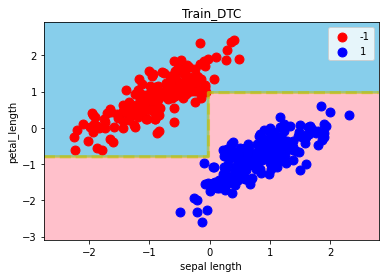

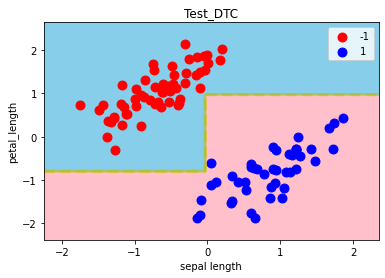

In [111]:
# 可視化（シンプルデータセット１）

train_DTC1 = decision_region(X_train_set1_std, y_train_set1, dtc_set1, title='Train_DTC',
                             xlabel='sepal length', ylabel='petal_length', target_names=['-1', '1'])
test_DTC1 = decision_region(X_test_set1_std, y_test_set1, dtc_set1, title='Test_DTC',
                            xlabel='sepal length', ylabel='petal_length', target_names=['-1', '1'])

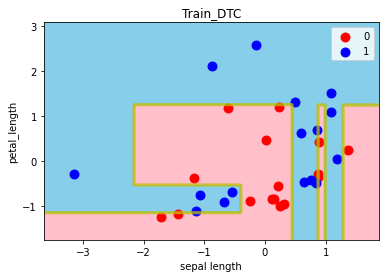

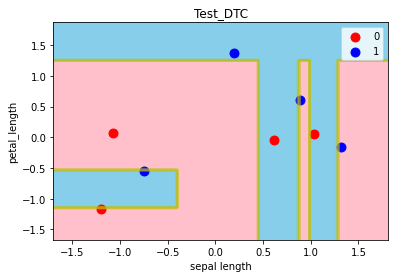

In [112]:
# 可視化（シンプルデータセット2）

train_DTC2 = decision_region(X_train_set2_std, y_train_set2, dtc_set2, title='Train_DTC',
                             xlabel='sepal length', ylabel='petal_length', target_names=['0', '1'])
test_DTC2 = decision_region(X_test_set2_std, y_test_set2, dtc_set2, title='Test_DTC',
                            xlabel='sepal length', ylabel='petal_length', target_names=['0', '1'])

**回帰問題**

回帰は1種類をスクラッチします。

- 線形回帰

線形回帰は勾配降下法を用いて計算するSGDRegressorクラスを利用してください。

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

`train.csv`をダウンロードし、目的変数として`SalePrice`、説明変数として、`GrLivArea`と`YearBuilt`を使います。

### 【問題3】 回帰問題を解くコードの作成

線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

In [113]:
# データセットを読み込み、指定された変数を抽出する

train_csv = pd.read_csv(
    "../diveintocode-ml/house-prices-advanced-regression-techniques/train.csv")
train_df = train_csv.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]

In [114]:
train_df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [115]:
# 作成した関数を用いて訓練用と検証用に分割する(80:20)
XX_train, XX_test, yy_train, yy_test = scratch_train_test_split(
    train_df.iloc[:, :-1].values, train_df.loc[:, "SalePrice"].values, train_size=0.8)

# データ型を確認する
print("XX_train.shape : {}, XX_test.shape : {}".format(
    XX_train.shape, XX_test.shape))
print("yy_train.shape : {}, yy_test.shape : {}".format(
    yy_train.shape, yy_test.shape))

XX_train.shape : (1168, 2), XX_test.shape : (292, 2)
yy_train.shape : (1168,), yy_test.shape : (292,)


In [116]:
# 標準化

scaler = StandardScaler()
scaler.fit(XX_train)
XX_train_std = scaler.transform(XX_train)
XX_test_std = scaler.transform(XX_test)

In [117]:
# SGDRegressorクラスを読み込む
from sklearn.linear_model import SGDRegressor

# インスタンスを生成し、学習する
sgdr = SGDRegressor()
sgdr.fit(XX_train_std, yy_train)

# 推定する
yy_pred_sgdr = sgdr.predict(XX_test_std)

In [118]:
# 各指標値を求め、表示する
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("平均二乗誤差：{}".format(mean_squared_error(yy_test, yy_pred_sgdr)))
print("平均絶対誤差：{}".format(mean_absolute_error(yy_test, yy_pred_sgdr)))
print("二乗平均平方根誤差：{}".format(np.sqrt(mean_squared_error(yy_test, yy_pred_sgdr))))
print("決定係数：{}".format(r2_score(yy_test, yy_pred_sgdr)))

平均二乗誤差：1876391806.5087729
平均絶対誤差：30240.910854325513
二乗平均平方根誤差：43317.338405178736
決定係数：0.6825164860008137


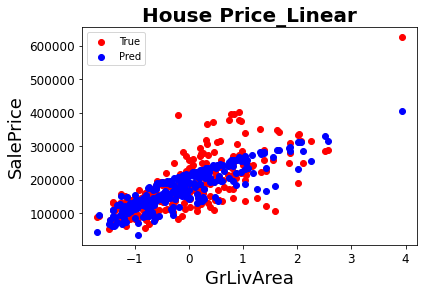

In [119]:
x_1 = XX_test_std[:, 0]  # GrLivAreaでラベル1でTure
x_2 = XX_test_std[:, 0]  # GrLivAreaでラベル2でPred

y_1 = yy_test  # SalePriceでラベル1
y_2 = yy_pred_sgdr  # SalePriceでラベル2

# 散布図を描画
plt.title("House Price_Linear", size=20, weight='heavy')
plt.xlabel("GrLivArea", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

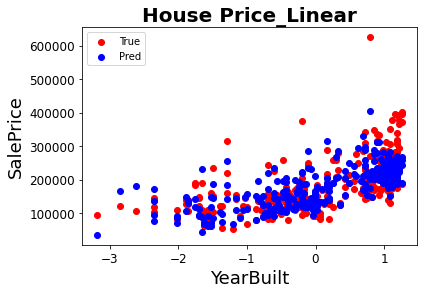

In [121]:
x_1 = XX_test_std[:, 1]  # YearBuiltでラベル1でTure
x_2 = XX_test_std[:, 1]  # YearBuiltでラベル2でPred

y_1 = yy_test  # SalePriceでラベル1
y_2 = yy_pred_sgdr  # SalePriceでラベル2

# 散布図を描画
plt.title("House Price_Linear", size=20, weight='heavy')
plt.xlabel("YearBuilt", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

### 【問題3】（発展）回帰問題をLightGBMで分析してみる
ハイパーパラメーターを自動で最適化してくれるoptunaを試して見たい！！

**＜参考サイト＞**

Optuna の拡張機能 LightGBM Tuner によるハイパーパラメータ自動最適化

https://tech.preferred.jp/ja/blog/hyperparameter-tuning-with-optuna-integration-lightgbm-tuner/


ハイパーパラメータ自動最適化ツール「Optuna」公開

https://tech.preferred.jp/ja/blog/optuna-release/


LightGBM Tunerを用いたハイパーパラメーターのチューニング

https://qiita.com/askl4267/items/28b476f76b01699430fe


LightGBMをOptunaでパラメータチューニングする

https://qiita.com/hideki/items/c09242639fd74abe73a0


OptunaのLightGBMTunerが便利

https://rin-effort.com/2020/01/14/machine-learning-9/


Python: LightGBM を使ってみる

https://blog.amedama.jp/entry/2018/05/01/081842


Python: Optuna で機械学習モデルのハイパーパラメータを選ぶ

https://blog.amedama.jp/entry/2018/12/06/015217


In [123]:
!pip install optuna

     |████████████████████████████████| 282 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 159 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 479 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 10.1 MB/s eta 0:00:01
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75674 sha256=7cac2b76b236cb65e9a4b475e1326e696d8d68c4b8b1167b119b2d315feb3d4c
  Stored in directory: /Users/SHOTA/Library/Caches/pip/wheels/2a/60/32/02a16820f96c067f6161ef35c21559f8db52c4158d6602b438
  Created wheel for PrettyTable: filename=prettytable-0.7.2-py3-none-any.whl size=13700 sha256=79da2f8693021f39acbe0950e2e2dd75679a69e8b78fb89b0a4430891a646c70
  Stored in directory: /Users/SHOTA/Library/Caches/pip/wheels/8c/76/0b/eb9eb3da7e2335e3577e3

In [124]:
import optuna.integration.lightgbm as lgb

lgb_train = lgb.Dataset(XX_train_std, yy_train)
lgb_test = lgb.Dataset(XX_test_std, yy_test)

params = {
    'objective': 'mean_squared_error',
    'metric': 'rmse'}
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_test,
                verbose_eval=False,
                num_boost_round=100,
                early_stopping_rounds=100)

# preds = gbm.predict(XX_test_std)
# pred_labels = np.rint(preds)

[I 2021-01-18 15:24:40,066] A new study created in memory with name: no-name-e576048e-fe32-4bad-af2d-1d9b4e43ef7c
feature_fraction, val_score: 37576.568808:  14%|#4        | 1/7 [00:00<00:00,  7.27it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781


feature_fraction, val_score: 37576.568808:  43%|####2     | 3/7 [00:00<00:00,  6.98it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781


feature_fraction, val_score: 37576.568808:  71%|#######1  | 5/7 [00:00<00:00,  6.81it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781


feature_fraction, val_score: 37576.568808:  86%|########5 | 6/7 [00:01<00:00,  4.91it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781


num_leaves, val_score: 37576.568808:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

num_leaves, val_score: 37576.568808:  10%|#         | 2/20 [00:00<00:06,  2.84it/s]

No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 37494.670589:  20%|##        | 4/20 [00:00<00:03,  4.22it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

num_leaves, val_score: 37494.670589:  25%|##5       | 5/20 [00:01<00:03,  4.33it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

num_leaves, val_score: 37494.670589:  35%|###5      | 7/20 [00:01<00:02,  4.97it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

num_leaves, val_score: 37494.670589:  45%|####5     | 9/20 [00:01<00:01,  5.95it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

num_leaves, val_score: 37494.670589:  55%|#####5    | 11/20 [00:01<00:01,  6.33it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

num_leaves, val_score: 37125.855286:  70%|#######   | 14/20 [00:02<00:00,  7.77it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [I

num_leaves, val_score: 37125.855286:  75%|#######5  | 15/20 [00:02<00:00,  8.06it/s]

No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

num_leaves, val_score: 37125.855286:  80%|########  | 16/20 [00:02<00:00,  5.58it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

num_leaves, val_score: 37125.855286:  85%|########5 | 17/20 [00:02<00:00,  5.58it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

num_leaves, val_score: 37125.855286:  90%|######### | 18/20 [00:02<00:00,  5.57it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

num_leaves, val_score: 37125.855286:  95%|#########5| 19/20 [00:03<00:00,  5.51it/s]

No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

bagging, val_score: 37108.977200:  10%|#         | 1/10 [00:00<00:01,  8.85it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-thr

bagging, val_score: 37108.977200:  40%|####      | 4/10 [00:00<00:00,  9.43it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info]

bagging, val_score: 37108.977200:  80%|########  | 8/10 [00:00<00:00, 12.21it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info]

bagging, val_score: 37108.977200: 100%|##########| 10/10 [00:00<00:00, 14.18it/s]
feature_fraction_stage2, val_score: 37108.977200:   0%|          | 0/6 [00:00<?, ?it/s][I 2021-01-18 15:24:45,713] Trial 37 finished with value: 37108.97719981747 and parameters: {'feature_fraction': 0.852}. Best is trial 37 with value: 37108.97719981747.
feature_fraction_stage2, val_score: 37108.977200:  33%|###3      | 2/6 [00:00<00:00, 18.66it/s][I 2021-01-18 15:24:45,769] Trial 38 finished with value: 37108.97719981747 and parameters: {'feature_fraction': 0.9159999999999999}. Best is trial 37 with value: 37108.97719981747.
feature_fraction_stage2, val_score: 37108.977200:  33%|###3      | 2/6 [00:00<00:00, 18.66it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info]

feature_fraction_stage2, val_score: 37108.977200:  33%|###3      | 2/6 [00:00<00:00, 18.66it/s][I 2021-01-18 15:24:45,848] Trial 39 finished with value: 37108.97719981747 and parameters: {'feature_fraction': 0.948}. Best is trial 37 with value: 37108.97719981747.
feature_fraction_stage2, val_score: 37108.977200:  67%|######6   | 4/6 [00:00<00:00, 16.78it/s][I 2021-01-18 15:24:45,917] Trial 40 finished with value: 37108.97719981747 and parameters: {'feature_fraction': 0.9799999999999999}. Best is trial 37 with value: 37108.97719981747.
feature_fraction_stage2, val_score: 37108.977200:  67%|######6   | 4/6 [00:00<00:00, 16.78it/s][I 2021-01-18 15:24:45,979] Trial 41 finished with value: 37108.97719981747 and parameters: {'feature_fraction': 0.82}. Best is trial 37 with value: 37108.97719981747.
feature_fraction_stage2, val_score: 37108.977200: 100%|##########| 6/6 [00:00<00:00, 16.84it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info]

[I 2021-01-18 15:24:46,256] Trial 42 finished with value: 37108.97719981747 and parameters: {'feature_fraction': 0.8839999999999999}. Best is trial 37 with value: 37108.97719981747.
feature_fraction_stage2, val_score: 37108.977200: 100%|##########| 6/6 [00:00<00:00, 10.00it/s]
regularization_factors, val_score: 37108.976215:   0%|          | 0/20 [00:00<?, ?it/s][I 2021-01-18 15:24:46,324] Trial 43 finished with value: 37108.9762146475 and parameters: {'lambda_l1': 1.226222536125238e-07, 'lambda_l2': 6.51669096477237e-05}. Best is trial 43 with value: 37108.9762146475.
regularization_factors, val_score: 37108.956189:  15%|#5        | 3/20 [00:00<00:00, 17.12it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info]

regularization_factors, val_score: 37108.914144:  35%|###5      | 7/20 [00:00<00:00, 17.32it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in t

regularization_factors, val_score: 37108.737069:  50%|#####     | 10/20 [00:00<00:00, 14.91it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info]

regularization_factors, val_score: 37108.605540:  70%|#######   | 14/20 [00:00<00:00, 15.86it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info]

regularization_factors, val_score: 37108.605540:  90%|######### | 18/20 [00:01<00:00, 15.46it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info]

min_data_in_leaf, val_score: 37108.605540:  40%|####      | 2/5 [00:00<00:00, 14.84it/s][I 2021-01-18 15:24:47,697] Trial 64 finished with value: 41165.46708437597 and parameters: {'min_child_samples': 100}. Best is trial 63 with value: 39463.43145363841.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info]

min_data_in_leaf, val_score: 36232.408649: 100%|##########| 5/5 [00:00<00:00, 14.44it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info] Start training from score 180948.941781
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 2
[LightGBM] [Info]

In [125]:
# 調整後のベストパラメータで推定する
yy_pred_lgb = gbm.predict(XX_test_std, num_iteration=gbm.best_iteration)

# ベストパラメータを取得する
best_params = gbm.params
print("Params:")
for key, value in best_params.items():
    print("  {}: {}".format(key, value))

# 各指標値を求め、表示する
print("平均二乗誤差：{}".format(mean_squared_error(yy_test, yy_pred_lgb)))
print("平均絶対誤差：{}".format(mean_absolute_error(yy_test, yy_pred_lgb)))
print("二乗平均平方根誤差：{}".format(np.sqrt(mean_squared_error(yy_test, yy_pred_lgb))))
print("決定係数：{}".format(r2_score(yy_test, yy_pred_lgb)))

Params:
  objective: mean_squared_error
  metric: rmse
  feature_pre_filter: False
  lambda_l1: 7.767996836709492
  lambda_l2: 0.024019969343042995
  num_leaves: 6
  feature_fraction: 0.8999999999999999
  bagging_fraction: 0.8967696697664425
  bagging_freq: 4
  min_child_samples: 10
  num_iterations: 100
  early_stopping_round: 100
平均二乗誤差：1312787436.5264015
平均絶対誤差：25740.087613647498
二乗平均平方根誤差：36232.408649252146
決定係数：0.7778777507785728


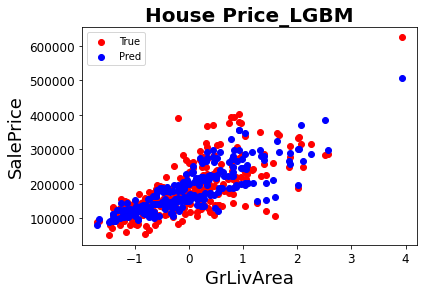

In [127]:
x_1 = XX_test_std[:, 0]  # GrLivAreaでラベル1でTure
x_2 = XX_test_std[:, 0]  # GrLivAreaでラベル2でPred

y_1 = yy_test  # SalePriceでラベル1
y_2 = yy_pred_lgb  # SalePriceでラベル2

# 散布図を描画
plt.title("House Price_LGBM", size=20, weight='heavy')
plt.xlabel("GrLivArea", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

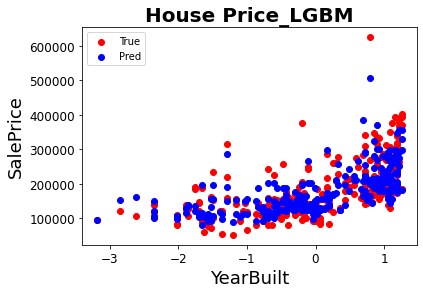

In [128]:
x_1 = XX_test_std[:, 1]  # YearBuiltでラベル1でTure
x_2 = XX_test_std[:, 1]  # YearBuiltでラベル2でPred

y_1 = yy_test  # SalePriceでラベル1
y_2 = yy_pred_lgb  # SalePriceでラベル2

# 散布図を描画
plt.title("House Price_LGBM", size=20, weight='heavy')
plt.xlabel("YearBuilt", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()